In [2]:
# Importing the libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.preprocessing import image

In [3]:
# Loading the CIFAR10 model

(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
# Reshaping to one dimensional array

y_train = y_train.reshape(-1,)
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test.shape

(10000, 1)

In [10]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [11]:
# Reshaping to one dimensional array

y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

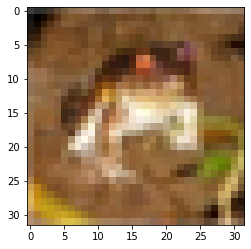

In [12]:

plt.imshow(x_train[0])

In [13]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [14]:
# Normalising the image

x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

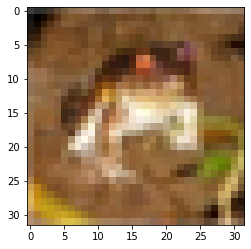

In [16]:
plt.imshow(x_train[0])

In [17]:
# CNN Model

cnn = models.Sequential([
                         layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)), 
                         layers.MaxPooling2D((2,2)),

                         layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'), 
                         layers.MaxPooling2D((2,2)), 
                         
                         layers.Flatten(),

                         layers.Dense(64,activation='relu'),
                         layers.Dense(10,activation='softmax')

])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                147520    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [19]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.4480 - accuracy: 0.4815
Epoch 2/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.0966 - accuracy: 0.6142
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9658 - accuracy: 0.6623
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8779 - accuracy: 0.6937
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8082 - accuracy: 0.7191
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7542 - accuracy: 0.7377
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7002 - accuracy: 0.7573
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6558 - accuracy: 0.7704
Epoch 9/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6147 - accuracy: 0.7857
Epoch 10/10
1563/1563 [==============================] - 54s 35m

In [20]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9455 - accuracy: 0.6992


[0.9455353617668152, 0.6991999745368958]

In [21]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[1.2353711e-03, 2.0937175e-03, 3.5485346e-04, 9.4603640e-01,
        1.7586659e-05, 2.1457307e-02, 1.7573362e-02, 7.6009665e-06,
        1.0419428e-02, 8.0445840e-04],
       [3.5960146e-04, 7.5391304e-01, 1.2775760e-08, 3.1598347e-07,
        3.5580464e-10, 1.3293603e-09, 8.0493825e-09, 7.0699961e-12,
        2.4572542e-01, 1.5650546e-06],
       [5.0750382e-02, 7.2723484e-01, 5.9712038e-04, 1.1186216e-03,
        2.4252317e-03, 8.5473235e-05, 6.1719024e-05, 2.6900263e-04,
        1.7993055e-01, 3.7527062e-02],
       [8.9727879e-01, 1.5066849e-02, 9.5335729e-03, 5.6993397e-04,
        4.3917172e-02, 2.2279848e-05, 9.5683485e-05, 3.9492032e-05,
        3.3448622e-02, 2.7666598e-05],
       [2.1372166e-08, 2.1494105e-05, 6.3179739e-02, 4.8177563e-02,
        7.8419840e-01, 3.2315406e-03, 1.0117508e-01, 3.1134748e-06,
        1.1500095e-05, 1.5888280e-06]], dtype=float32)

In [22]:
output = [np.argmax(i) for i in y_pred]
output[:5]

[3, 1, 1, 0, 4]

In [23]:
def pic_predict(pic_name):
  pic = image.load_img(pic_name,target_size=(32,32))
  pic_arr = image.img_to_array(pic)
  pic = np.expand_dims(pic_arr,axis=0)
  classifier = cnn.predict(pic)
  value = np.argmax(classifier)
  if value == 9:
    print("Truck")
  elif value == 8:
    print("Ship")
  else:
    print("Sorry..! Can't classify")

In [25]:
pic_predict('/content/images.jpeg')

Ship


In [26]:
tf.keras.models.save_model(cnn,'truck-ship-classifier.hdf5')